# dynamic Programming
## Basic concepts
    http://www.geeksforgeeks.org/dynamic-programming/
## Basic programming problem
- Program for Fibonacci numbers

In [8]:
#only use recursion(start with 0..fib(0) = 0, fib(1) = 0+1 ...) 
def fib(num):
    if num < 3:
        return num
    return fib(num-1) + fib(num-2)
print(fib(8))

34


In [15]:
#recursion with cache
def fib(num):
    num -= 1
    global cache
    cache = [None for _ in range(num + 1)]
    
    def _fib(num):
        if num < 3:
            return num
        global cache
        if cache[num]:
            return cache[num]
        result = _fib(num - 1) + _fib(num - 2)
        cache[num] = result
        return result
    return _fib(num)
print(fib(9))    

34


In [16]:
#dp
def fib(num):
    fib = [0, 1, 2]
    for i in range(3, num):
        fib.append(fib[i-1] + fib[i-2])
    return fib[-1]
print(fib(9))

34


In [17]:
#optimized memory space
def fib(num):
    a = 0
    b = 1
    c = a + b
    for i in range(2, num):
        a = b
        b = c
        c = a + b
    return c

print(fib(9))

34


## Binomial Coefficient
Following are common definition of Binomial Coefficients.
- A binomial coefficient C(n, k) can be defined as the coefficient of X^k in the expansion of (1 + X)^n.
- A binomial coefficient C(n, k) also gives the number of ways, disregarding order, that k objects can be chosen from among n objects; more formally, the number of k-element subsets (or k-combinations) of an n-element set.
### The problem
Write a function that takes two parameters n and k and returns the value of Binomial Coefficient C(n, k). For example, your function should return 6 for n = 4 and k = 2, and it should return 10 for n = 5 and k = 2.

In [20]:
#recurision
def bin_coefficient(n, k):
    fac = [None for _ in range(n + 1)]
    
    def _love(n):
        if n < 3:
            return n
        if fac[n]:
            return fac[n]
        fac[n] = _love(n-1) * n
        return fac[n]
    
    return _love(n)/_love(k) / _love(n-k)
print(bin_coefficient(5, 2))

10.0


The value of C(n, k) can be recursively calculated using following standard formula for Binomial Coefficients.

     C(n, k) = C(n-1, k-1) + C(n-1, k)
     C(n, 0) = C(n, n) = 1

    

In [26]:
#dummy version without cache
global call_count
call_count = 0
def bin_coefficient(n, k):
    global call_count
    call_count += 1
    if(n == k):
        return 1
    if(k == 0):
        return 1
    return bin_coefficient(n-1, k-1) + bin_coefficient(n-1, k)
print(bin_coefficient(5, 2), " call:",call_count)

10 call:  19


In [32]:
#add cache
global cache
global count
count = 0
def bin_coefficient(n, k):
    cache = [[None for _ in range(k+1)] for _ in range(n+1)]
    def _xql(n, k):
        global count
        count += 1
        if(n == k):
            return 1
        if(k == 0):
            return 1
        if not cache[n-1][k-1]:
            cache[n-1][k-1] = _xql(n-1, k-1)
        if not cache[n - 1][k]:
            cache[n - 1][k] = _xql(n-1, k)
        return cache[n-1][k-1]+cache[n - 1][k] 
    return _xql(n, k)
print(bin_coefficient(5, 2), count)

10 11


## Longest Common Subsequence
We have discussed Overlapping Subproblems and Optimal Substructure properties in Set 1 and Set 2 respectively. We also discussed one example problem in Set 3. Let us discuss Longest Common Subsequence (LCS) problem as one more example problem that can be solved using Dynamic Programming.

LCS Problem Statement: Given two sequences, find the length of longest subsequence present in both of them. A subsequence is a sequence that appears in the same relative order, but not necessarily contiguous. For example, “abc”, “abg”, “bdf”, “aeg”, ‘”acefg”, .. etc are subsequences of “abcdefg”. So a string of length n has 2^n different possible subsequences.

It is a classic computer science problem, the basis of diff (a file comparison program that outputs the differences between two files), and has applications in bioinformatics.

**Examples:**
LCS for input Sequences “ABCDGH” and “AEDFHR” is “ADH” of length 3.
LCS for input Sequences “AGGTAB” and “GXTXAYB” is “GTAB” of length 4.

In [61]:
global a
global b
a = "AGGTAB"
b = "GXTXAYB"
def lcs():
    a_len = len(a)
    b_len = len(b)
    global cache 
    cache = [[None for _ in range(b_len+1)] for _ in range(a_len+1)]
    
    for i in range(a_len+1):
        for j in range(b_len+1):
            if i==0 or j == 0:
                cache[i][j] = 0
            else:
                if a[i-1] == b[j-1]:
                    cache[i][j] = cache[i-1][j-1] + 1
                else:
                    cache[i][j] = max(cache[i-1][j], cache[i][j-1])
    print(cache)
    return cache[-1][-1]
        
print(lcs())

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 2, 2, 2, 2, 2], [0, 1, 1, 2, 2, 3, 3, 3], [0, 1, 1, 2, 2, 3, 3, 4]]
4


## Largest Sum Contiguous Subarray
Write an efficient C program to find the sum of contiguous subarray within a one-dimensional array of numbers which has the largest sum.
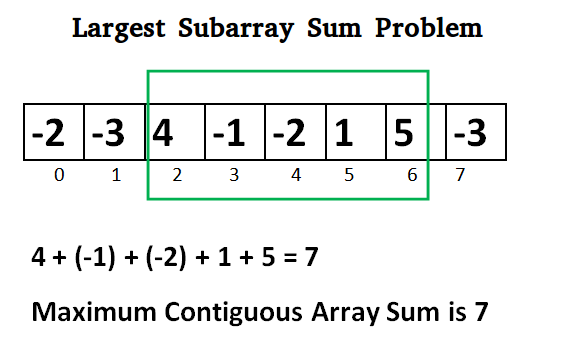

max so far
max ending here

max so far -----
if max ending here < 0:
    max ending here = 0
else
    max ending here += i
if max so far < max ending here:
    max so far = max ending here

In [64]:
def max_substring(string):
    if not string:
        return None
    if len(string) == 1:
        return string[0]
    max_so_far = string[0]
    max_ending_here = string[0]
    for i in string[1:]:
        if max_ending_here + i <= 0:
            max_ending_here = 0
        else:
            max_ending_here += i
        if max_ending_here > max_so_far:
            max_so_far = max_ending_here
    return max_so_far

a = [4,-1, -2, 1, 5]
print(max_substring(a))

7


## Ugly Numbers
Ugly numbers are numbers whose only prime factors are 2, 3 or 5. The sequence 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, … shows the first 11 ugly numbers. By convention, 1 is included.

Given a number n, the task is to find n’th Ugly number.

Input  : n = 7
Output : 8

Input  : n = 10
Output : 12

Input  : n = 15
Output : 24

Input  : n = 150
Output : 5832

In [ ]:
#dummy solution: compute all legall 
def cal(n):
    i = 5
    p = 5
    list = [2, 3, 4, 5]
    if n < 5:
        return list[n-1]
    
    while(i < n):
        p += 1
        if((p / 2) in list):
            list.append(p)
            i += 1
            continue
        if((p / 3) in list):
            list.append(p)
            i += 1
            continue
            
        if((p / 5) in list):
            list.append(p)
            i += 1 
            continue
    print(list)
    return p

print(cal(150))

### Method 2 (Use Dynamic Programming)

Here is a time efficient solution with O(n) extra space. The ugly-number sequence is 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, …
     because every number can only be divided by 2, 3, 5, one way to look at the sequence is to split the sequence to three groups as below:
     - 1×2, 2×2, 3×2, 4×2, 5×2, …
     - 1×3, 2×3, 3×3, 4×3, 5×3, …
     - 1×5, 2×5, 3×5, 4×5, 5×5, …
    
We can find that every subsequence is the ugly-sequence itself (1, 2, 3, 4, 5, …) multiply 2, 3, 5. Then we use similar merge method as merge sort, to get every ugly number from the three subsequence. Every step we choose the smallest one, and move one step after.

In [ ]:
#dp
def cal(n):
    list_2 = [2]
    list_3 = [3]
    list_5 = [5]
    i = 4
    for 

## Maximum size square sub-matrix with all 1s
Given a binary matrix, find out the maximum size square sub-matrix with all 1s.

For example, consider the below binary matrix.
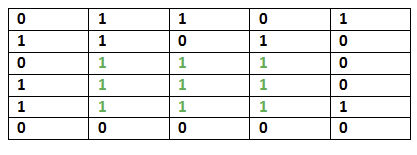

Algorithm:
Let the given binary matrix be M[R][C]. The idea of the algorithm is to construct an auxiliary size matrix S[][] in which each entry S[i][j] represents size of the square sub-matrix with all 1s including M[i][j] where M[i][j] is the rightmost and bottommost entry in sub-matrix.

- Construct a sum matrix S[R][C] for the given M[R][C].
     a)	Copy first row and first columns as it is from M[][] to S[][]
     b)	For other entries, use following expressions to construct S[][]
         If M[i][j] is 1 then
            S[i][j] = min(S[i][j-1], S[i-1][j], S[i-1][j-1]) + 1
         Else /*If M[i][j] is 0*/
            S[i][j] = 0
- Find the maximum entry in S[R][C]
- Using the value and coordinates of maximum entry in S[i], print 
   sub-matrix of M[][]
For the given M[R][C] in above example, constructed S[R][C] would be:

   0  1  1  0  1
   
   1  1  0  1  0
   
   0  1  1  1  0
   
   1  1  2  2  0
   
   1  2  2  3  1
   
   0  0  0  0  0

In [14]:
matrix =          [[0, 1, 1, 0, 1], 
                   [1, 1, 0, 1, 0], 
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 0, 0, 0]]

In [27]:
import numpy as np
def sub_maxtrix(matrix):
    matrix_len = len(matrix)
    cache = np.zeros((matrix_len+1, matrix_len+1))
    
    for i in range(1, len(matrix)):
        for j in range(1, len(matrix[i])):
            if matrix[i][j] == 1:
                cache[i][j] = min(cache[i][j-1], cache[i-1][j-1], cache[i-1][j]) + 1
            else:
                cache[i][j] = 0
    max_num = np.max(cache)
    return np.where(cache == max_num), max_num
a, b = sub_maxtrix(matrix)        
print(a, b)    

(array([4]), array([3])) 3.0


## Dynamic Programming | Set 3 (Longest Increasing Subsequence)
We have discussed Overlapping Subproblems and Optimal Substructure properties.

Let us discuss Longest Increasing Subsequence (LIS) problem as an example problem that can be solved using Dynamic Programming.
The Longest Increasing Subsequence (LIS) problem is to find the length of the longest subsequence of a given sequence such that all elements of the subsequence are sorted in increasing order. For example, the length of LIS for {10, 22, 9, 33, 21, 50, 41, 60, 80} is 6 and LIS is {10, 22, 33, 50, 60, 80}.
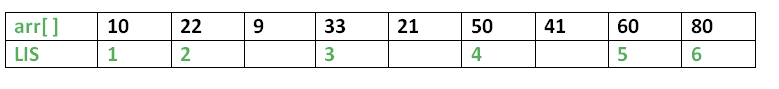
Input  : arr[] = {3, 10, 2, 1, 20}
Output : Length of LIS = 3
The longest increasing subsequence is 3, 10, 20

Input  : arr[] = {3, 2}
Output : Length of LIS = 1
The longest increasing subsequences are {3} and {2}

Input : arr[] = {50, 3, 10, 7, 40, 80}
Output : Length of LIS = 4
The longest increasing subsequence is {3, 7, 40, 80}

In [37]:
#naive approach
def lis(array):
    a_len = len(array)
    cache = [1 for _ in range(a_len + 1)]
    trace = [[] for _ in range(a_len + 1)]
    for i, value in enumerate(array):
        for j, pre_value in enumerate(array[:i]):
            if value > pre_value:
                if(cache[i] < cache[j] + 1):
                    trace[i].append(pre_value)
                    cache[i] = cache[j] + 1
    max_len = max(cache)
    print(trace)
    return max_len
print(lis([3, 10, 2, 1, 20]))

[[], [3], [], [], [3, 10], []]
3


## Dynamic Programming | Set 6 (Min Cost Path)
Given a cost matrix cost[ ][ ] and a position (m, n) in cost[ ][ ], write a function that returns cost of minimum cost path to reach (m, n) from (0, 0). Each cell of the matrix represents a cost to traverse through that cell. Total cost of a path to reach (m, n) is sum of all the costs on that path (including both source and destination). You can only traverse down, right and diagonally lower cells from a given cell, i.e., from a given cell (i, j), cells (i+1, j), (i, j+1) and (i+1, j+1) can be traversed. You may assume that all costs are positive integers.
For example, in the following figure, what is the minimum cost path to (2, 2)?
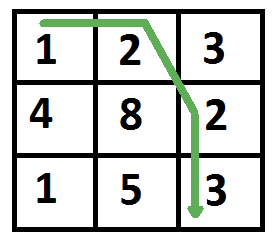
The path with minimum cost is highlighted in the following figure. The path is (0, 0) –> (0, 1) –> (1, 2) –> (2, 2). The cost of the path is 8 (1 + 2 + 2 + 3).
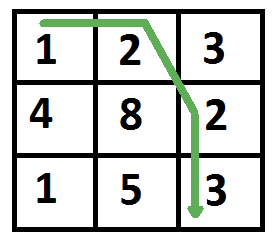
Recommended: Please solve it on “PRACTICE” first, before moving on to the solution.



In [9]:
import numpy  as np
def lowest_cost(cost_map, m, n):
    x = len(cost_map)
    y = len(cost_map[0])
    
    #init cache
    cache = np.zeros((x, y))
    temp = 0
    cache[0][0] = cost_map[0][0]
    
    for i, value in enumerate(cost_map[0]):
        temp += value
        cache[0][i] = temp
    temp = 0
    for j, value in enumerate(cost_map):
        temp += value[0]
        cache[j][0] = temp
    
    for i in range(1, x):
        for j in range(1, y):
            cache[i][j] = min(cache[i][j-1], cache[i-1][j], cache[i-1][j-1]) + cost_map[i][j]
    print(cache)
    return cache[m][n]
b =  [ [1, 2, 3],
                      [4, 8, 2],
                      [1, 5, 3] ]


lowest_cost(b, 2 ,2 )

[[  1.   3.   6.]
 [  5.   9.   5.]
 [  6.  10.   8.]]


8.0

## Dynamic Programming | Set 7 (Coin Change)
Given a value N, if we want to make change for N cents, and we have infinite supply of each of S = { S1, S2, .. , Sm} valued coins, how many ways can we make the change? The order of coins doesn’t matter.

For example, for N = 4 and S = {1,2,3}, there are four solutions: {1,1,1,1},{1,1,2},{2,2},{1,3}. So output should be 4. For N = 10 and S = {2, 5, 3, 6}, there are five solutions: {2,2,2,2,2}, {2,2,3,3}, {2,2,6}, {2,3,5} and {5,5}. So the output should be 5.

In [2]:
#dumy approach
def coin_change(cents):
    coin_type = [2, 5, 3, 6]
    num_of_coin = cents // min(coin_type)
    cache = [[] for _ in range(num_of_coin)]
    cache[0] = [[2], [5], [3], [6]]
    ret = []
    if cents in coin_type:
        ret.append([cents])
    for i in range(1, num_of_coin):
        for pre_list in cache[i-1:]:
            for pre_value in pre_list:
                for coin_value in coin_type:
                    temp = sorted(pre_value + [coin_value])
                    if(sum(temp) < cents):
                        if temp not in cache[i]:
                            cache[i].append(temp)
                    elif (sum(temp) == cents):
                        if temp not in ret:
                            ret.append(temp)
    return ret

print(coin_change(5))

[[5], [2, 3]]


In [25]:
#better solution
# hard to controll shawllow copy or deep copy....
import copy
def coin_change(cents, coin_type):
    '''
    
    [
        [  [1,2,3], ... , [1,0,1]  ]
                    ...
                    ...
    ]
    
    '''
    
    cache = [[] for __ in range(cents+1)]
    
    for i,value in enumerate(coin_type):
        if value <= cents:
            temp = [0 for _ in coin_type]
            temp[i] = 1
            cache[value].append(temp)
    for pre_sum, num_cent_collection in enumerate(cache):
        if num_cent_collection:
            for one_set in num_cent_collection:
                for coin_type_num, coin_value in enumerate(coin_type):
                    if coin_value + pre_sum <= cents:
                        temp = copy.deepcopy(one_set)
                        temp[coin_type_num] += 1
                        if temp not in cache[coin_value+pre_sum]: 
                            cache[coin_value+pre_sum].append(temp)
    return cache[-1]

print(sorted(coin_change(100, [2, 5, 3, 6])))


[[0, 2, 0, 15], [0, 2, 2, 14], [0, 2, 4, 13], [0, 2, 6, 12], [0, 2, 8, 11], [0, 2, 10, 10], [0, 2, 12, 9], [0, 2, 14, 8], [0, 2, 16, 7], [0, 2, 18, 6], [0, 2, 20, 5], [0, 2, 22, 4], [0, 2, 24, 3], [0, 2, 26, 2], [0, 2, 28, 1], [0, 2, 30, 0], [0, 5, 1, 12], [0, 5, 3, 11], [0, 5, 5, 10], [0, 5, 7, 9], [0, 5, 9, 8], [0, 5, 11, 7], [0, 5, 13, 6], [0, 5, 15, 5], [0, 5, 17, 4], [0, 5, 19, 3], [0, 5, 21, 2], [0, 5, 23, 1], [0, 5, 25, 0], [0, 8, 0, 10], [0, 8, 2, 9], [0, 8, 4, 8], [0, 8, 6, 7], [0, 8, 8, 6], [0, 8, 10, 5], [0, 8, 12, 4], [0, 8, 14, 3], [0, 8, 16, 2], [0, 8, 18, 1], [0, 8, 20, 0], [0, 11, 1, 7], [0, 11, 3, 6], [0, 11, 5, 5], [0, 11, 7, 4], [0, 11, 9, 3], [0, 11, 11, 2], [0, 11, 13, 1], [0, 11, 15, 0], [0, 14, 0, 5], [0, 14, 2, 4], [0, 14, 4, 3], [0, 14, 6, 2], [0, 14, 8, 1], [0, 14, 10, 0], [0, 17, 1, 2], [0, 17, 3, 1], [0, 17, 5, 0], [0, 20, 0, 0], [1, 1, 1, 15], [1, 1, 3, 14], [1, 1, 5, 13], [1, 1, 7, 12], [1, 1, 9, 11], [1, 1, 11, 10], [1, 1, 13, 9], [1, 1, 15, 8], [1, 1, 17

## Dynamic Programming | Set 5 (Edit Distance)
Given two strings str1 and str2 and below operations that can performed on str1. Find minimum number of edits (operations) required to convert ‘str1’ into ‘str2’.
- Insert
- Remove
- Replace

All of the above operations are of equal cost.

In [3]:
def edit_distance(first, second, m, n):
    if m == 0:
        return n
    if n == 0:
        return m
    
    if first[m-1] == second[n-1]:
        return edit_distance(first, second, m-1, n-1)
    
    return 1 + min(edit_distance(first, second, m-1, n), edit_distance(first, second, m-1, n-1), edit_distance(first, second, m, n-1))

str1 = "sunday"
str2 = "saturday"
print (edit_distance(str1, str2, len(str1), len(str2)))

3


In [8]:
import numpy as np
def edit_distance(first, second, m, n):
    if first == second:
        return 0
    cache = [ [None for _ in range(n + 1)] for _ in range(m + 1)]
    
    
    for i in range(m + 1):
        for j in range(n + 1):
            if i==0:
                cache[i][j] = j
            elif j == 0:
                cache[i][j] = i
            elif(first[i-1] == second[j-1]):
                cache[i][j] = cache[i-1][j-1]
            else:
                cache[i][j] = 1 + min(cache[i-1][j], cache[i][j-1], cache[i-1][j-1])
                
    return cache[-1][-1]

str1 = "sunday"
str2 = "saturday"
 
print(edit_distance(str1, str2, len(str1), len(str2)))
            
    

3


## Dynamic Programming | Set 13 (Cutting a Rod)
Given a rod of length n inches and an array of prices that contains prices of all pieces of size smaller than n. Determine the maximum value obtainable by cutting up the rod and selling the pieces. For example, if length of the rod is 8 and the values of different pieces are given as following, then the maximum obtainable value is 22 (by cutting in two pieces of lengths 2 and 6)

In [16]:
def cutting_rod(price_list, length):
    cache = [0 for _ in range(length)]  
    for i, max_price in enumerate(cache):
        if i < len(price_list):
            cache[i] = price_list[i]
        for j in range(i - 1):
            cache[i] = max(cache[i], cache[j] + cache[i-j-1])
    return cache[-1]
arr = [1, 5, 8, 9, 10, 17, 17, 20]
print(cutting_rod(arr,8))

22


### Dynamic Programming | Set 25 (Subset Sum Problem)
Given a set of non-negative integers, and a value sum, determine if there is a subset of the given set with sum equal to given sum.

In [14]:
def subset_sum(num, n, set):
    if num == 0:
        return True
    if n < 0:
        return False
    if set[n] > num:
        return subset_sum(num, n-1, set)
    return subset_sum(num, n-1, set) or subset_sum(num - set[n], n-1, set)

subset_sum(6, 5, [3, 34, 4, 12, 5, 2])

True